In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
students_data = pd.read_csv('StudentsPerformance.csv')

In [3]:
students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
students_data.shape

(1000, 8)

In [7]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
students_data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [10]:
students_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
students_data.duplicated().sum()

0

In [12]:
students_data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
students_data.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [15]:
students_data.groupby('race/ethnicity').mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [16]:
students_data.groupby('parental level of education').mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [17]:
students_data.groupby('lunch').mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [19]:
students_data.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [42]:
students_data.groupby(['gender', 'test preparation course'])[['math score', 'writing score', 'reading score']].mean()

math score  writing score  reading score
gender test preparation course                                          
female completed                 67.195652      78.793478      77.375000
       none                      61.670659      68.982036      69.982036
male   completed                 72.339080      69.793103      70.212644
       none                      66.688312      59.649351      62.795455

In [26]:
students_data.pivot_table('math score', index='gender', columns='race/ethnicity')

race/ethnicity,group A,group B,group C,group D,group E
gender,,,,,
female,58.527778,61.403846,62.033333,65.248062,70.811594
male,63.735849,65.930233,67.611511,69.413534,76.746479


In [27]:
students_data.pivot_table('reading score', index='gender', columns='race/ethnicity')

race/ethnicity,group A,group B,group C,group D,group E
gender,,,,,
female,69.000000,71.076923,71.944444,74.046512,75.840580
male,61.735849,62.848837,65.424460,66.135338,70.295775


In [33]:
students_data.pivot_table('writing score', index='gender', columns='race/ethnicity')

race/ethnicity,group A,group B,group C,group D,group E
gender,,,,,
female,67.861111,70.048077,71.777778,75.023256,75.536232
male,59.150943,60.220930,62.712230,65.413534,67.394366


In [35]:
categorical_df = students_data.select_dtypes(include=['object'])
print(categorical_df.shape)
categorical_df.head()

(1000, 5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


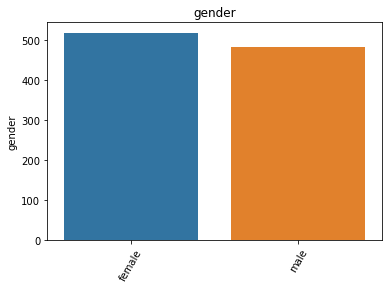

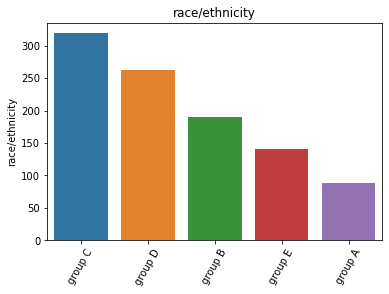

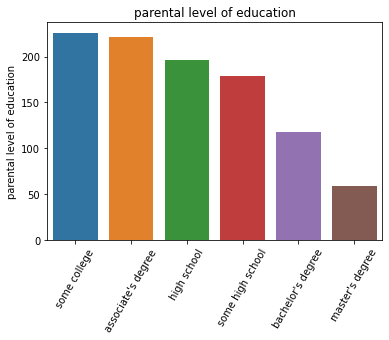

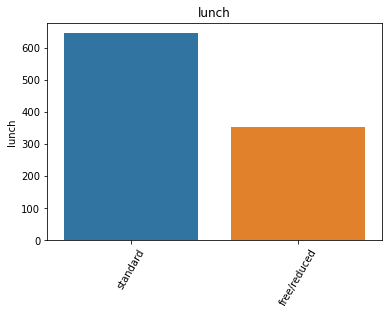

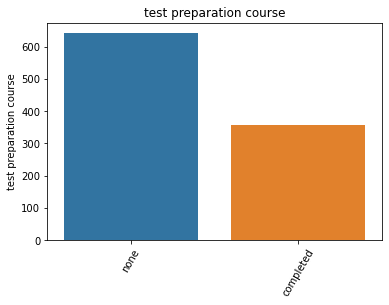

In [37]:
def bar():
    fig = plt.subplots()
    for feature in categorical_df:
        cat = students_data[feature].value_counts()
        chart = sns.barplot(cat.index, cat)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
        
        plt.title(feature)
        plt.show()
        
bar()        

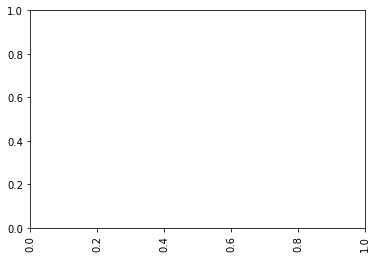

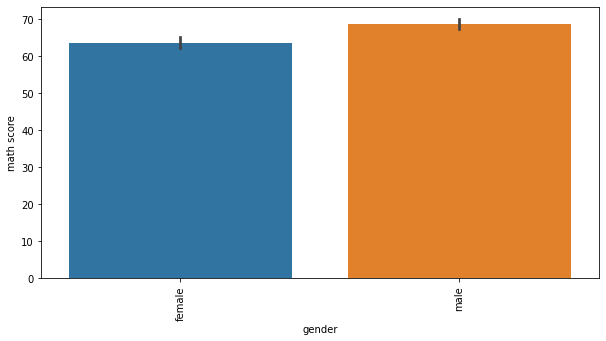

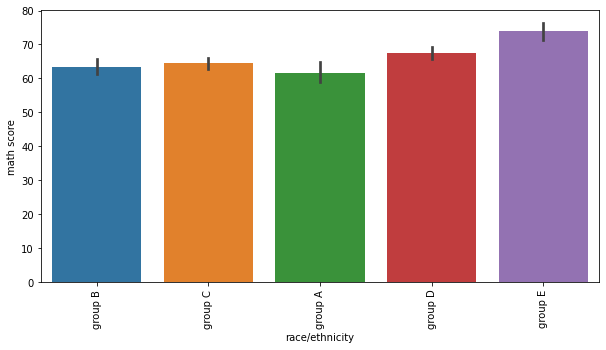

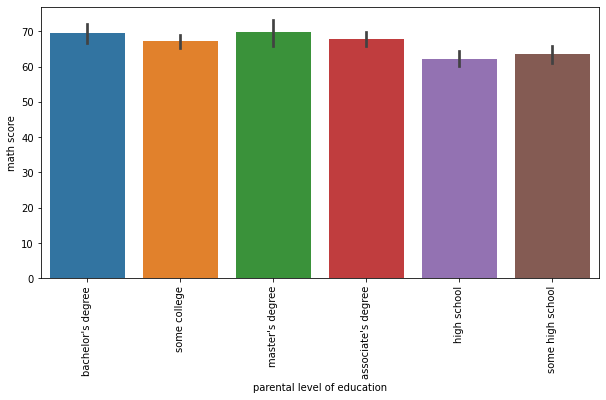

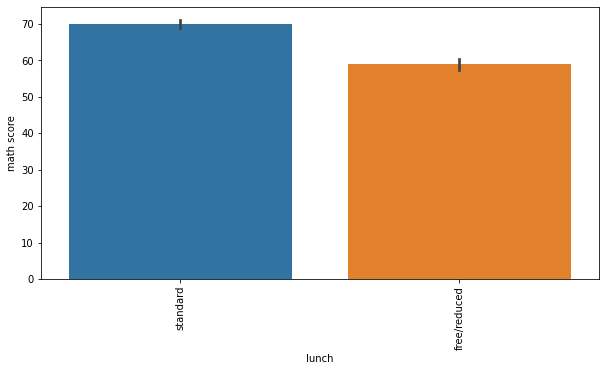

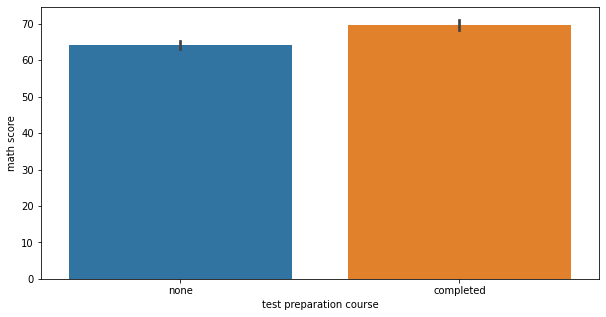

In [41]:
target = students_data['math score']
for col in categorical_df.columns:
    plt.xticks(rotation=90)
    plt.figure(figsize=(10,5))
    cat_feat = students_data[col]
    sns.barplot(x=cat_feat, y=target)

Text(0.5, 1.0, 'Distribution of gender')

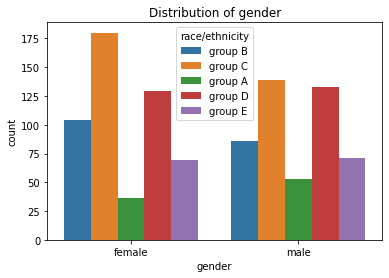

In [47]:
sns.countplot(x='gender',hue='race/ethnicity', data=students_data)
plt.title('Distribution of gender')

Text(0.5, 1.0, 'Distribution of completion of course')

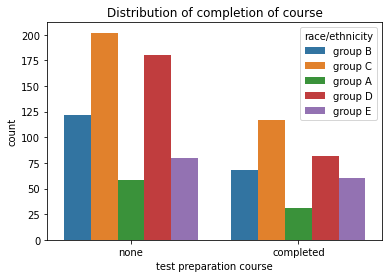

In [48]:
sns.countplot(x='test preparation course',hue='race/ethnicity', data=students_data)
plt.title('Distribution of completion of course')

In [49]:
numerical_df= students_data.select_dtypes(exclude=['object'])

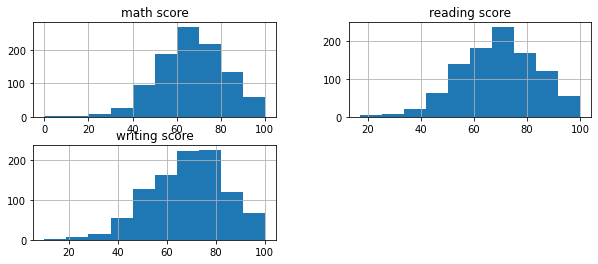

In [50]:
numerical_df.hist(figsize=(10,4))
plt.show()

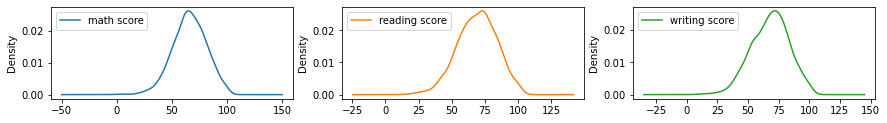

In [51]:
numerical_df.plot(kind='density', layout=(10,4), subplots=True, sharex=False, figsize=(20,20))
plt.show()

In [52]:
import plotly.express as px

In [53]:
matrix = numerical_df.corr()
matrix.round(2)

,math score,reading score,writing score
math score,1.00,0.82,0.80
reading score,0.82,1.00,0.95
writing score,0.80,0.95,1.00


<AxesSubplot:>

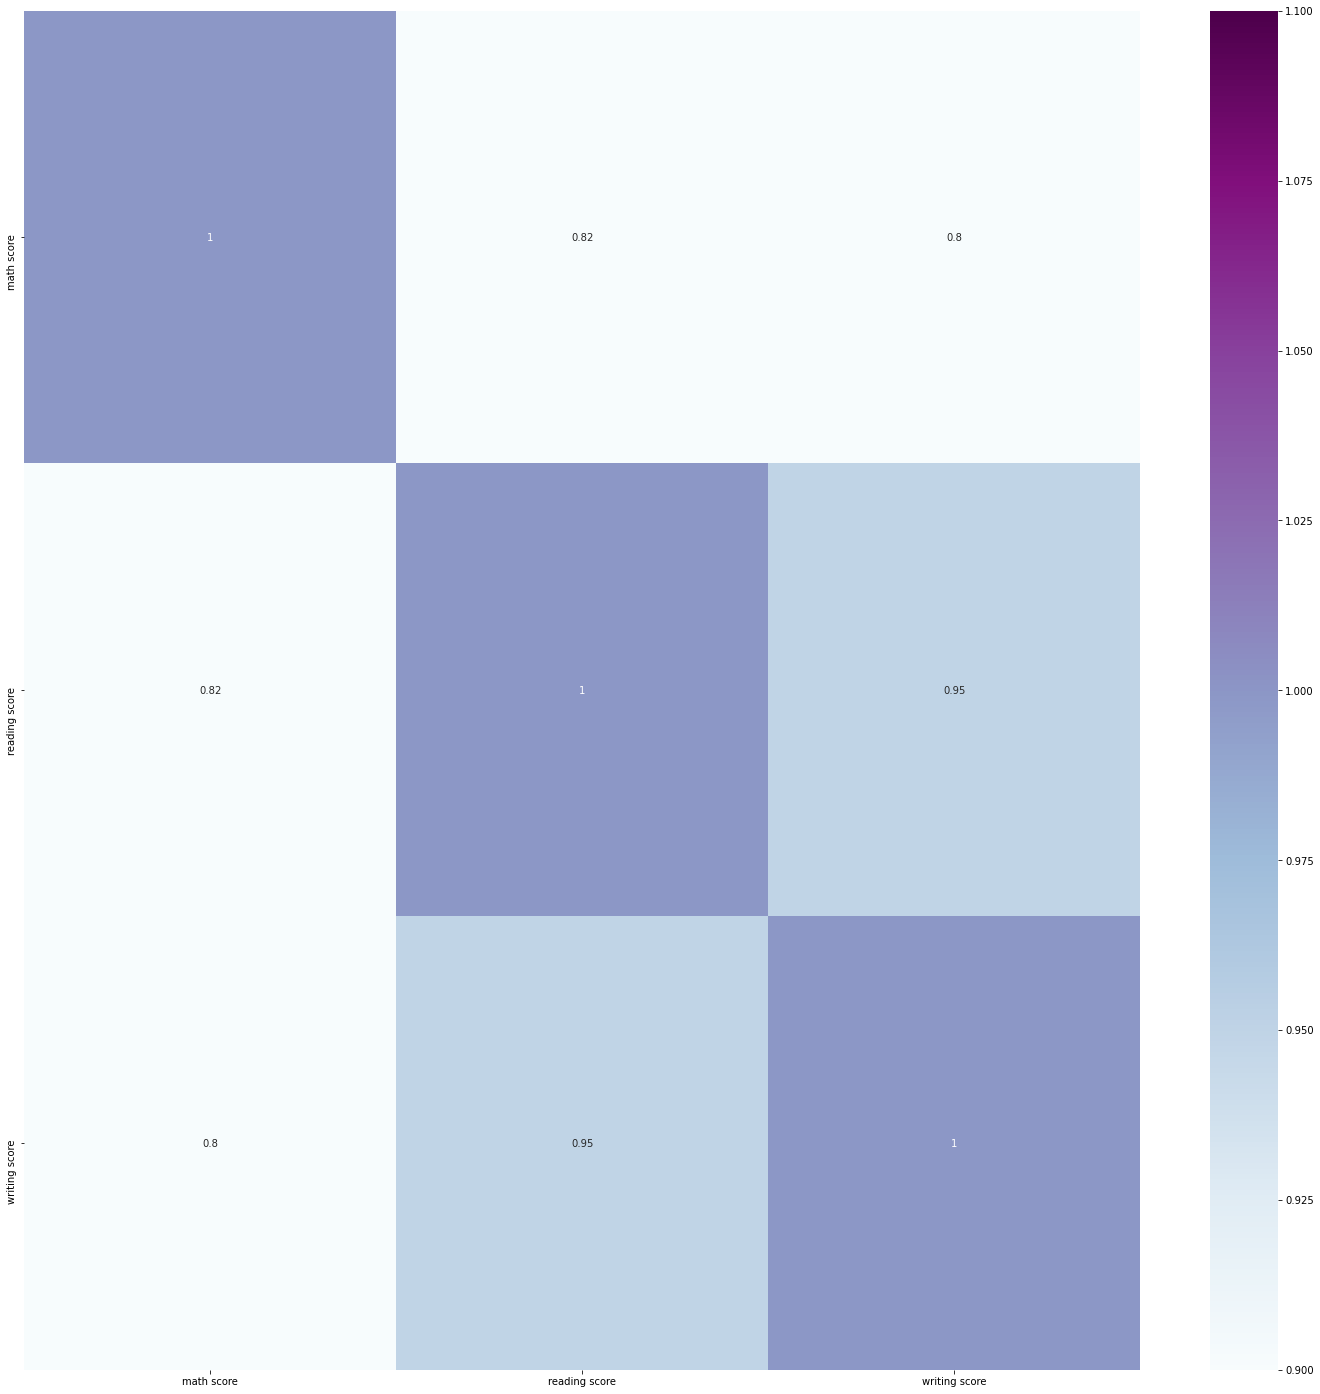

In [54]:
fig = plt.figure(figsize=(25,25))
sns.heatmap(matrix.round(2), vmax=1, vmin=1, cmap='BuPu', annot=True)


In [55]:
import pingouin as pg

In [58]:
female = students_data['math score'][students_data.gender =='female']
male = students_data['math score'][students_data.gender =='male']
print('mean difference: {:.4f}'.format(female.mean()-male.mean()))
res=pg.ttest(female,male,correction='auto')
display(res)

mean difference: -5.0950


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-5.398001,997.984075,two-sided,8.420838e-08,"[-6.95, -3.24]",0.340687,1.011e+05,0.999685


In [60]:
students_data.groupby('race/ethnicity')['math score'].mean()

race/ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math score, dtype: float64

In [61]:
aov = pg.anova(data=students_data, dv='math score', between= 'race/ethnicity', detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,race/ethnicity,12728.816698,4,3182.204175,14.593885,1.373219e-11,0.055418
1,Within,216960.262302,995,218.050515,NaN,NaN,NaN


In [62]:
pt = pg.pairwise_tukey(data = students_data, dv='math score', between='race/ethnicity')
pt

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,group A,group B,61.629213,63.452632,-1.823418,1.896745,-0.961341,0.859674,-0.123149
1,group A,group C,61.629213,64.463950,-2.834736,1.770184,-1.601380,0.496613,-0.191615
2,group A,group D,61.629213,67.362595,-5.733382,1.811701,-3.164641,0.013824,-0.387434
3,group A,group E,61.629213,73.821429,-12.192215,2.001876,-6.090393,0.001000,-0.822934
4,group B,group C,63.452632,64.463950,-1.011318,1.353210,-0.747347,0.900000,-0.068386
5,group B,group D,63.452632,67.362595,-3.909964,1.407085,-2.778769,0.044071,-0.264344
6,group B,group E,63.452632,73.821429,-10.368797,1.644730,-6.304253,0.001000,-0.700575
7,group C,group D,64.463950,67.362595,-2.898646,1.231177,-2.354369,0.128688,-0.196044
8,group C,group E,64.463950,73.821429,-9.357479,1.497013,-6.250767,0.001000,-0.632654
9,group D,group E,67.362595,73.821429,-6.458833,1.545884,-4.178084,0.001000,-0.436576


In [65]:
categorical_df['math score'] = students_data['math score']
students_data['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

In [66]:
bins = [0,57,66,77,100]
group = ['Low','Average','High','Very High']
categorical_df['price_cat'] = pd.cut(categorical_df['math score'] , bins , labels=group)
categorical_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,price_cat
0,female,group B,bachelor's degree,standard,none,72,High
1,female,group C,some college,standard,completed,69,High
2,female,group B,master's degree,standard,none,90,Very High
3,male,group A,associate's degree,free/reduced,none,47,Low
4,male,group C,some college,standard,none,76,High


In [67]:
categorical_df_1 = categorical_df.drop(['math score','price_cat'], 1)
price_cat = categorical_df.price_cat

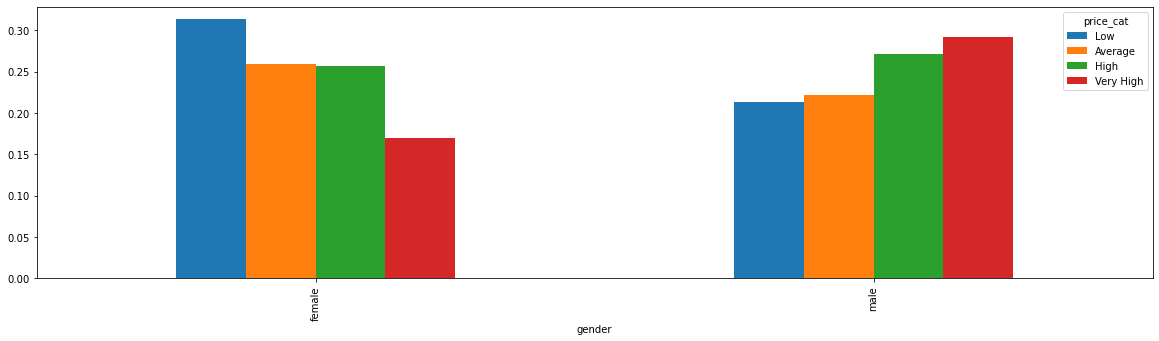

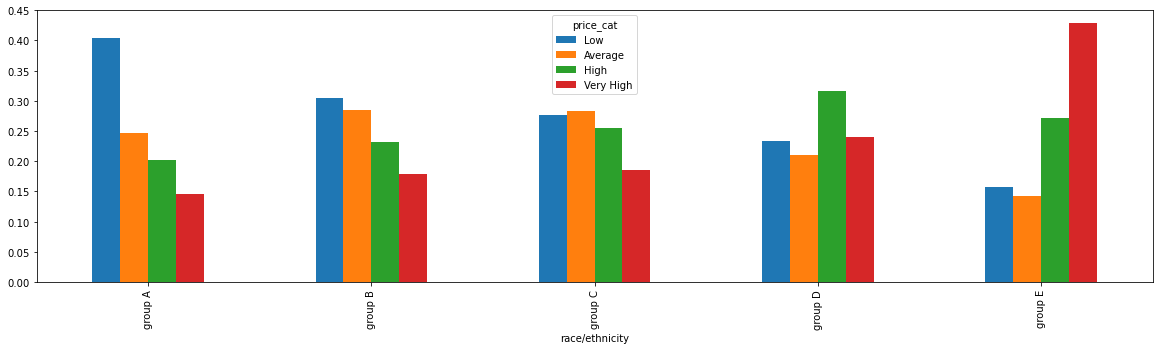

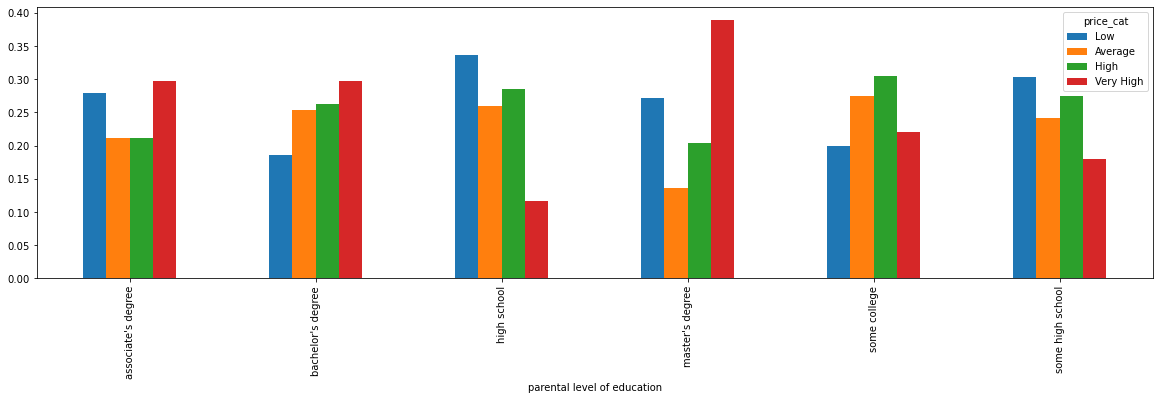

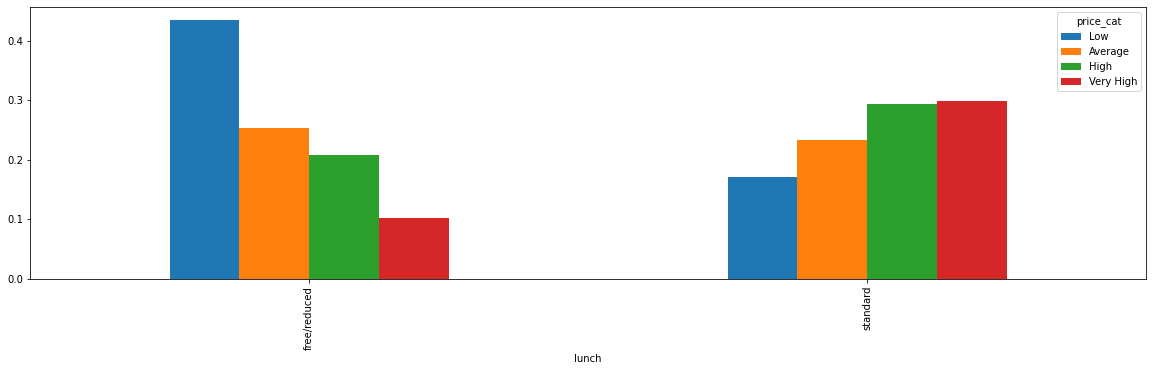

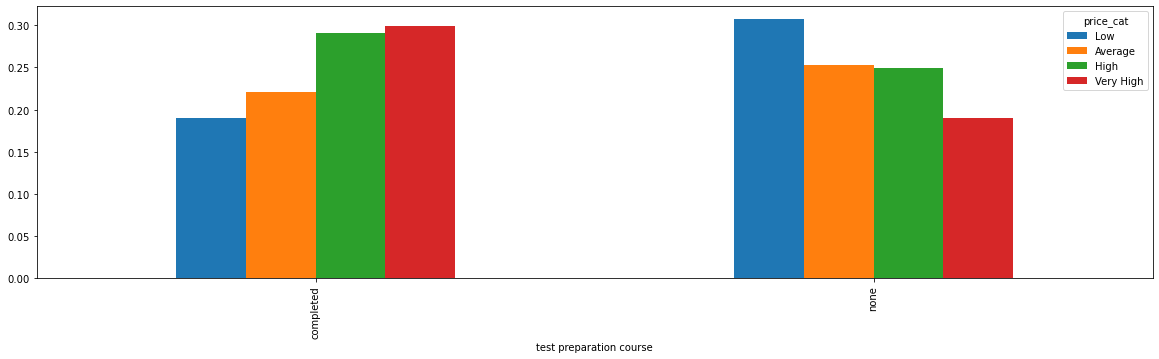

In [68]:
for col in categorical_df_1:
    price_bin = pd.crosstab(categorical_df[col], price_cat)
    price_bin.div(price_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(20, 5))
plt.show()    
    